# importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib .pyplot as plt
%matplotlib inline
import datetime
import string

# reading the data

In [2]:
df = pd.read_csv('train.csv')

In [3]:
#replacing / by _ in column names
df.columns = [col.replace("/", "_") for col in df.columns]

In [4]:
df.head()

,index,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timeStruct,review_timeUnix,user_ageInSeconds,user_birthdayRaw,user_birthdayUnix,user_gender,user_profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,Pours a clouded gold with a thin white head. N...,"{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, ...",1229398690,NaN,NaN,NaN,NaN,RblWthACoz
1,8135,11.0,3003,395,Bearded Pat's Barleywine,American Barleywine,4.0,3.5,3.5,3.5,3.0,12oz bottle into 8oz snifter.\t\tDeep ruby red...,"{'min': 38, 'hour': 23, 'mday': 8, 'sec': 58, ...",1218238738,NaN,NaN,NaN,NaN,BeerSox
2,10529,4.7,961,365,Naughty Nellie's Ale,American Pale Ale (APA),3.5,4.0,3.5,3.5,3.5,First enjoyed at the brewpub about 2 years ago...,"{'min': 7, 'hour': 18, 'mday': 26, 'sec': 2, '...",1101492422,NaN,NaN,NaN,Male,mschofield
3,44610,4.4,429,1,Pilsner Urquell,Czech Pilsener,3.0,3.0,2.5,3.0,3.0,First thing I noticed after pouring from green...,"{'min': 7, 'hour': 1, 'mday': 20, 'sec': 5, 'y...",1308532025,1.209827e+09,"Aug 10, 1976",208508400.0,Male,molegar76
4,37062,4.4,4904,1417,Black Sheep Ale (Special),English Pale Ale,4.0,3.0,3.0,3.5,2.5,A: pours an amber with a one finger head but o...,"{'min': 51, 'hour': 6, 'mday': 12, 'sec': 48, ...",1299912708,NaN,NaN,NaN,NaN,Brewbro000


In [5]:
df.columns

Index(['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_aroma', 'review_overall',
       'review_palate', 'review_taste', 'review_text', 'review_timeStruct',
       'review_timeUnix', 'user_ageInSeconds', 'user_birthdayRaw',
       'user_birthdayUnix', 'user_gender', 'user_profileName'],
      dtype='object')

In [6]:
df.shape

(37500, 19)

In [7]:
df.describe()

,index,beer_ABV,beer_beerId,beer_brewerId,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_timeUnix,user_ageInSeconds,user_birthdayUnix
count,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,24951.887573,7.403725,21861.152027,3036.595120,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,14434.009669,2.318145,18923.130832,5123.084675,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.000000,0.100000,175.000000,1.000000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,12422.500000,5.400000,5441.000000,395.000000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,24942.500000,6.900000,17538.000000,1199.000000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,37416.750000,9.400000,34146.000000,1315.000000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,49999.000000,57.700000,77207.000000,27797.000000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              37500 non-null  int64  
 1   beer_ABV           37500 non-null  float64
 2   beer_beerId        37500 non-null  int64  
 3   beer_brewerId      37500 non-null  int64  
 4   beer_name          37500 non-null  object 
 5   beer_style         37500 non-null  object 
 6   review_appearance  37500 non-null  float64
 7   review_aroma       37500 non-null  float64
 8   review_overall     37500 non-null  float64
 9   review_palate      37500 non-null  float64
 10  review_taste       37500 non-null  float64
 11  review_text        37490 non-null  object 
 12  review_timeStruct  37500 non-null  object 
 13  review_timeUnix    37500 non-null  int64  
 14  user_ageInSeconds  7856 non-null   float64
 15  user_birthdayRaw   7856 non-null   object 
 16  user_birthdayUnix  785

In [9]:
# will drop few columns ahead
df.isnull().sum()

index                    0
beer_ABV                 0
beer_beerId              0
beer_brewerId            0
beer_name                0
beer_style               0
review_appearance        0
review_aroma             0
review_overall           0
review_palate            0
review_taste             0
review_text             10
review_timeStruct        0
review_timeUnix          0
user_ageInSeconds    29644
user_birthdayRaw     29644
user_birthdayUnix    29644
user_gender          22186
user_profileName         5
dtype: int64

In [10]:
# this fields has a lot of missing data and some of them has no relevance,its better to just remove the data
df = df.drop(['user_ageInSeconds','user_birthdayRaw','user_birthdayUnix','user_gender','beer_beerId','index','beer_brewerId'],1)

In [11]:
# extracting length of review
df["length_of_review"] = df["review_text"].apply(lambda review: -1 if type(review) == float else len(review))

In [12]:
# converting timeunix to datetime obj
df['time'] = [datetime.datetime.fromtimestamp(int(timeunix)).strftime('%Y-%m-%d %H:%M:%S') for timeunix in df.review_timeUnix.tolist()]
df.time = pd.to_datetime(df.time)

In [13]:
#extracting month day year
df['month'] = df.time.apply(lambda _ : _.month_name())
df['day'] = df.time.apply(lambda _ : _.day_name())
df['year'] = df.time.apply(lambda _ : _.year)

In [14]:
#number of unique beer_style
df['beer_style'].nunique()

95

In [15]:
df.isnull().sum()

beer_ABV              0
beer_name             0
beer_style            0
review_appearance     0
review_aroma          0
review_overall        0
review_palate         0
review_taste          0
review_text          10
review_timeStruct     0
review_timeUnix       0
user_profileName      5
length_of_review      0
time                  0
month                 0
day                   0
year                  0
dtype: int64

In [16]:
#removing remaing nan value 
df.dropna(axis=0,inplace=True)

# sentiment analysis

In [17]:
import nltk
from nltk import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [18]:
#instantiating WordNetLemmatizer
wnl = WordNetLemmatizer()

In [19]:
#reading in stopword txt
stopwords = [line.rstrip('\n') for line in open("stopword.txt")]
stoplist = [word.lower() for word in stopwords]

In [20]:
def text_process(review):
    """
    returns a cleaned , lematized, words without any stopwords.
    """
    if type(review) == float:
        return "Not Available"
    nopunc = review.translate(str.maketrans('', '', string.punctuation))  # removes puntuations
    kw = [wnl.lemmatize(word).lower() for word in nopunc.split() if word.lower() not in stoplist]  # lemmatize words
    return " ".join(kw)  # keywords use this with top_keywords

In [21]:
df['clean_review'] = df.review_text.apply(text_process)

In [22]:
# for sentiment analysis
sid = SentimentIntensityAnalyzer()

In [23]:
# score's a dict which contains score of neutrality, negativity, positivity in a review
df.loc[:, ("scores")] = df["review_text"].apply(
    lambda rev: sid.polarity_scores(rev) if type(rev) == str else "no")

# compound has overall score of all three moods
df.loc[:, ("compound")] = df["scores"].apply(
    lambda dic: dic["compound"] if type(dic) == dict else "no")

In [24]:
def label(data_):
    """
    return sentiment based on the score 
    """
    if data_ > 0.8:
        return ("Positive")
    elif -0.2 <= data_ <= 0.8:
        return("Neutral")
    else:
        return ("Negative")

In [25]:
df.loc[:, ("sentiment")] = df["compound"].apply(lambda _: label(_))

In [26]:
df.sentiment.value_counts()

Positive    27916
Neutral      7574
Negative     1995
Name: sentiment, dtype: int64

In [27]:
df.columns

Index(['beer_ABV', 'beer_name', 'beer_style', 'review_appearance',
       'review_aroma', 'review_overall', 'review_palate', 'review_taste',
       'review_text', 'review_timeStruct', 'review_timeUnix',
       'user_profileName', 'length_of_review', 'time', 'month', 'day', 'year',
       'clean_review', 'scores', 'compound', 'sentiment'],
      dtype='object')

In [28]:
def avg_abv_beerstyle(styles):
    '''
    returns a list of avg beer_abv with respect to beerstyle
    '''
    avg_abv = []
    for style in styles:
        avg_abv.append(df[df['beer_style']==style]['beer_ABV'].mean())
    return avg_abv
def avg_abv_beername(names):
    '''
    returns a list of avg beer_abv with respect to beername
    '''
    avg_abv = []
    for name in names:
        avg_abv.append(df[df['beer_name']==name]['beer_ABV'].mean())
    return avg_abv

In [29]:
df['avg_abv_beerstyle'] = avg_abv_beerstyle(df.beer_style.to_list())
df['avg_abv_beername'] = avg_abv_beername(df.beer_name.to_list())

In [30]:
df= df.drop(['review_timeUnix','review_timeStruct','scores'],1)

# EDA

In [31]:
#
neg_reviews = df[df.sentiment == 'Negative']
neg_words = []
for review in neg_reviews.clean_review:
    neg_words.append(review)

In [32]:
neg_text = pd.Series(neg_words).str.cat(sep=' ')

In [33]:
from wordcloud import WordCloud

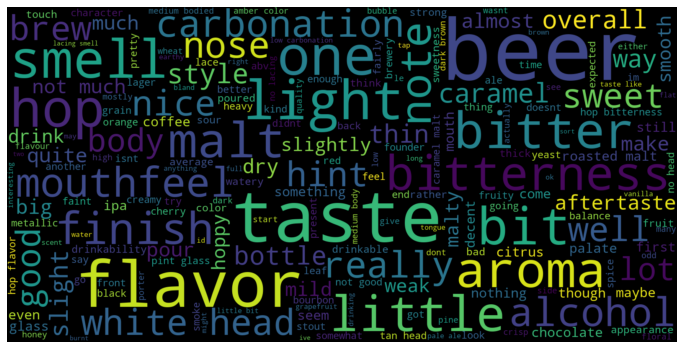

In [34]:
#plotting word cloud
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(neg_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [35]:
pos_reviews = df[df.sentiment == 'Positive']
pos_words = []
for reviews in pos_reviews.clean_review:
    pos_words.append(review)


In [36]:
pos_text = pd.Series(pos_words).str.cat(sep=' ')


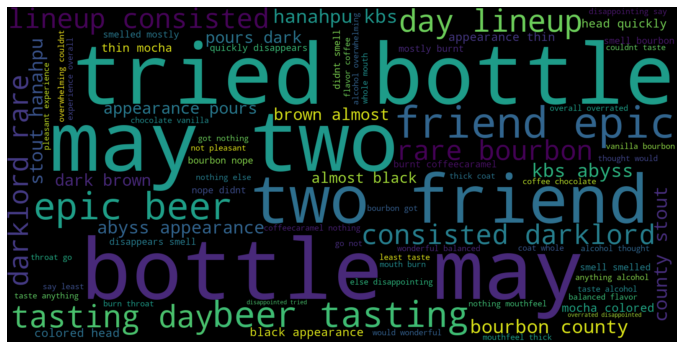

In [37]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(pos_text)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
#getting top keywords using countvectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(2,5))
cvector.fit(df.clean_review)

CountVectorizer(min_df=0.0, ngram_range=(2, 5))

In [39]:
len(cvector.get_feature_names())

8048783

In [40]:
neg_matrix = cvector.transform(df[df.sentiment == 'Negative'].clean_review)

pos_matrix = cvector.transform(df[df.sentiment == 'Positive'].clean_review)

In [41]:
#adds same words count
neg_words = neg_matrix.sum(axis=0)
#tuple unpacking of method vocabulary_.items()
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
# sorting and creating dataframe
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','negative'])
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head()

,negative
Terms,
white head,346
not much,212
roasted malt,173
tan head,153
hop bitterness,153


In [42]:
#adds same words count
pos_words = pos_matrix.sum(axis=0)
#tuple unpacking of method vocabulary_.items()
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
# sorting and creating dataframe
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head()

,positive
Terms,
white head,4078
roasted malt,3676
tan head,3007
pint glass,2702
dark chocolate,2379


In [43]:
sns.set_context('paper')

Text(0.5, 1.0, 'count of rating')

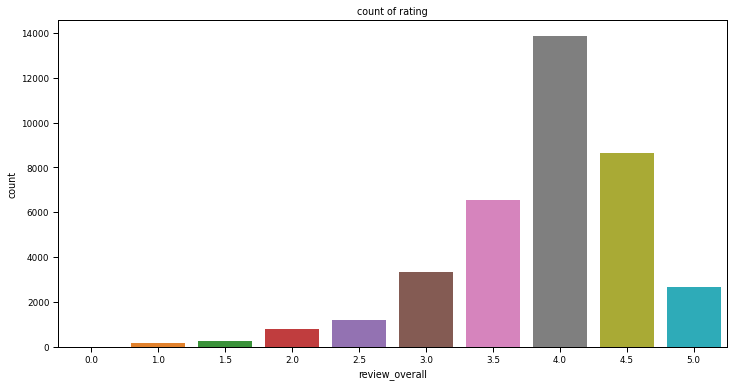

In [44]:
plt.figure(figsize=(12,6))
sns.countplot(df.review_overall)
plt.title('count of rating')

Text(0.5, 1.0, 'length of review_text')

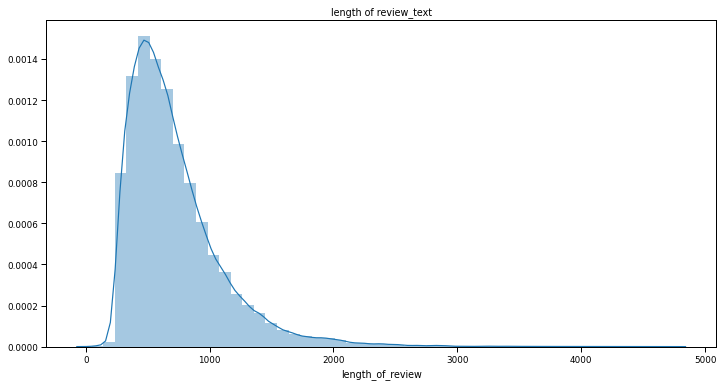

In [45]:
plt.figure(figsize=(12,6))
sns.distplot(df.length_of_review)
plt.title('length of review_text')

Text(0.5, 1.0, 'beer_abv vs rating')

<Figure size 864x432 with 0 Axes>

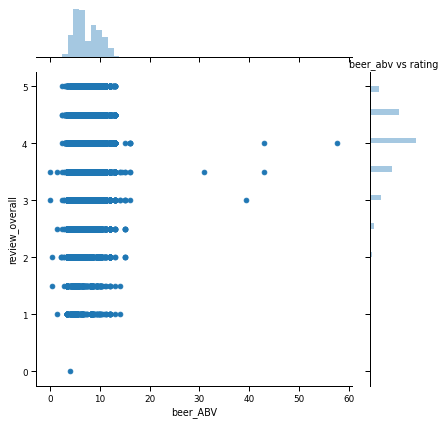

In [46]:
plt.figure(figsize=(12,6))
sns.jointplot(df.beer_ABV,df.review_overall)
plt.tight_layout()
plt.title('beer_abv vs rating')

Text(0.5, 1.0, 'year vs count')

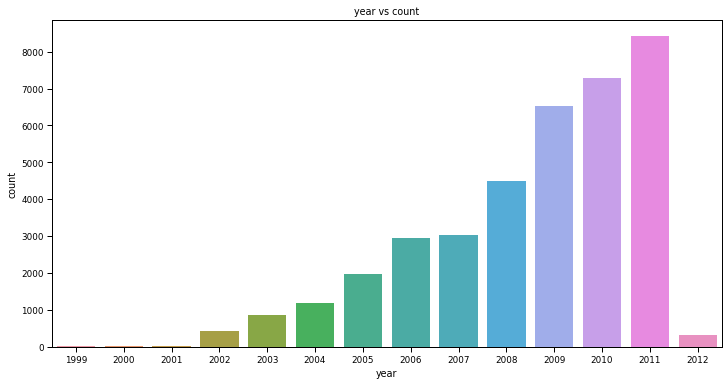

In [47]:
plt.figure(figsize=(12,6))
sns.countplot(df.year)
plt.title('year vs count')

Text(0.5, 1.0, 'rating vs beer_abv')

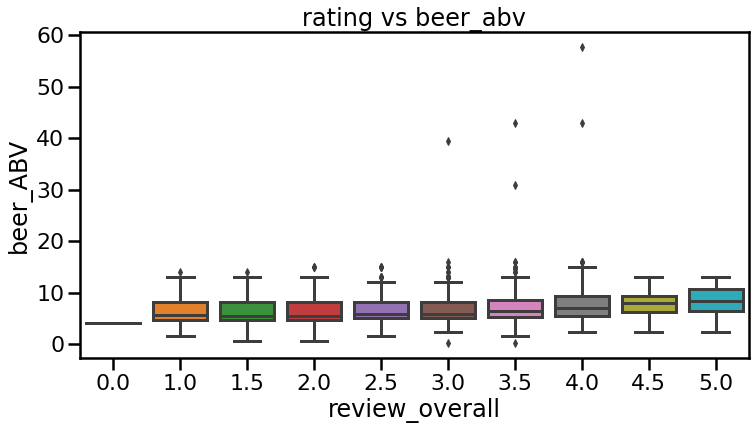

In [48]:
plt.figure(figsize=(12,6))
sns.set_context('poster')
sns.boxplot(df.review_overall,df.beer_ABV,)
plt.title('rating vs beer_abv')

Text(0.5, 1.0, 'length_reviews vs rating')

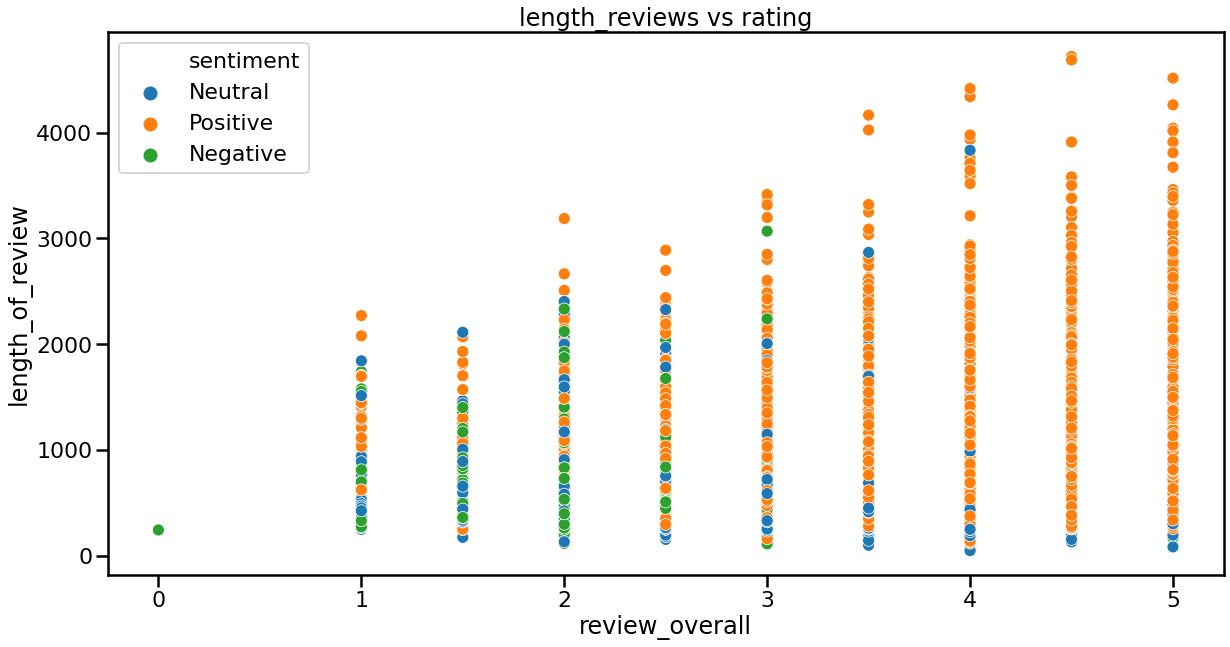

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df.review_overall,y=df.length_of_review,hue=df.sentiment)
plt.title('length_reviews vs rating')

# Training Models

In [50]:
df.columns

Index(['beer_ABV', 'beer_name', 'beer_style', 'review_appearance',
       'review_aroma', 'review_overall', 'review_palate', 'review_taste',
       'review_text', 'user_profileName', 'length_of_review', 'time', 'month',
       'day', 'year', 'clean_review', 'compound', 'sentiment',
       'avg_abv_beerstyle', 'avg_abv_beername'],
      dtype='object')

In [51]:
#features set
X = df[['beer_ABV','review_appearance',
       'review_aroma' ,'review_palate', 'review_taste','length_of_review',
       'compound', 'sentiment',
       'avg_abv_beerstyle','avg_abv_beername']].values

In [52]:
# importing libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [53]:
#one hot encode
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[-3])],remainder='passthrough')

In [54]:
X = np.asarray(ct.fit_transform(X)).astype(np.float32)

In [55]:
y= df['review_overall'].values

In [56]:
y = np.asarray(y).astype(np.float32)

In [57]:
#for normalizing data
scaler = StandardScaler()

In [58]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [59]:
#scaling data
X_train[:,3:] = scaler.fit_transform(X_train[:,3:])
X_test[:,3:] = scaler.transform(X_test[:,3:])

In [60]:
#importing models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [61]:
algo_lr = LinearRegression()

model_lr = algo_lr.fit(X_train,y_train)

pred_lr = model_lr.predict(X_test)

In [62]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [63]:
print(f'linear_regression_mse {mean_squared_error(y_test,pred_lr)}')

print(f'linear_regression_mae {mean_absolute_error(y_test,pred_lr)}')

print(f'linear_regression_rmse {np.sqrt(mean_squared_error(y_test,pred_lr))}')

linear_regression_mse 0.15777459740638733
linear_regression_mae 0.30270877480506897
linear_regression_rmse 0.3972085118293762


In [64]:
algo_svr = SVR(kernel='rbf')

model_svr= algo_svr.fit(X_train,y_train)

pred_svr = model_svr.predict(X_test)

In [65]:
print(f'suppor_vector_regressor_mse {mean_squared_error(y_test,pred_svr)}')

print(f'suppor_vector_regressor_mae {mean_absolute_error(y_test,pred_svr)}')

print(f'suppor_vector_regressor_rmse {np.sqrt(mean_squared_error(y_test,pred_svr))}')

suppor_vector_regressor_mse 0.15642502151070534
suppor_vector_regressor_mae 0.298827543745947
suppor_vector_regressor_rmse 0.39550603220520586


In [66]:
algo_rf = RandomForestRegressor()

model_rf = algo_rf.fit(X_train,y_train)

pred_rf = model_rf.predict(X_test)

In [67]:
print(f'random_forest_regressor_mse {mean_squared_error(y_test,pred_rf)}')

print(f'random_forest_regressor_mae {mean_absolute_error(y_test,pred_rf)}')

print(f'random_forest_regressor_rmse {np.sqrt(mean_squared_error(y_test,pred_rf))}')

random_forest_regressor_mse 0.16549936974789917
random_forest_regressor_mae 0.3120855008670135
random_forest_regressor_rmse 0.4068161375214842


In [68]:
# train deep learmning model

In [71]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [72]:
#early stop stops the the training when pleutue hits.
early_stop = EarlyStopping(monitor='val_loss',patience=5,verbose=1)

In [73]:
#initializing model
model = Sequential()

#40 layer of neural net
model.add(Dense(40,activation='relu'))

model.add(Dense(20,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(10,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [74]:
#fiting model
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test)
          ,epochs=400,callbacks=[early_stop])

Epoch 1/400
938/938 [==============================] - 2s 2ms/step - loss: 1.3921 - val_loss: 0.1776
Epoch 2/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1732 - val_loss: 0.1702
Epoch 3/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1674 - val_loss: 0.1579
Epoch 4/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1653 - val_loss: 0.1602
Epoch 5/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1646 - val_loss: 0.1585
Epoch 6/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1636 - val_loss: 0.1635
Epoch 7/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1628 - val_loss: 0.1574
Epoch 8/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1618 - val_loss: 0.1566
Epoch 9/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1621 - val_loss: 0.1595
Epoch 10/400
938/938 [==============================] - 2s 2ms/step - loss: 0.1620 - val_lo

In [77]:
prediction = model.predict(X_test)

<Figure size 864x576 with 0 Axes>

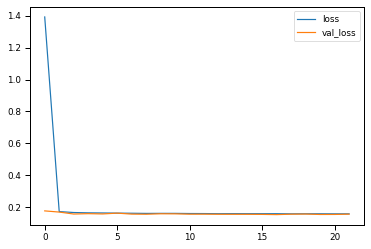

In [75]:
#early stop suggest when to stop based on pleatue hit of loss or accuracy 
plt.figure(figsize=(12,8))
sns.set_context('paper')
losses = pd.DataFrame(model.history.history)
losses.plot()
plt.ticklabel_format(style='plain',axis='y')

In [79]:
print(f'neural_net_mse {mean_squared_error(y_test,prediction)}')

print(f'neural_net_mae {mean_absolute_error(y_test,prediction)}')

print(f'neural_net_rmse {np.sqrt(mean_squared_error(y_test,prediction))}')

neural_net_mse 0.15699318051338196
neural_net_mae 0.30469992756843567
neural_net_rmse 0.39622366428375244


In [80]:
import joblib

In [81]:
joblib.dump(model_lr,"linear_regression_model.pkl")
joblib.dump(model_svr,"SVR_model.pkl")
joblib.dump(model_rf,"random_forest_model.pkl")
joblib.dump(scaler,'standardscaler.pkl')
joblib.dump(ct,'columntransfer.pkl')

['columntransfer.pkl']

In [83]:
model.save('nn.h5')